In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
# load data from database
engine = create_engine('sqlite:///data/DisasterResponse.db')
df = pd.read_sql_table('Disaster_Response_Table', engine)

<BarContainer object of 3 artists>

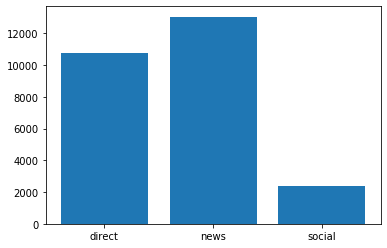

In [2]:
#Calculate number of messages in each genre
Genre_distribution = df.groupby('genre').count()

#Plot out the result
X_genre = Genre_distribution.index
Y_genre = Genre_distribution.iloc[:,0]
plt.bar(X_genre, Y_genre)

In [3]:
#Calculate number of messages in each type
Quantity_Type = df.sum(axis=0)

#Plot out the result
X_type_count = Quantity_Type.iloc[3:].index
Y_type_count = Quantity_Type.iloc[3:].values
plt.figure(figsize=[20,10])
plt.xticks(rotation=45)
plt.bar(X_type_count, Y_type_count)

In [29]:
#Try out plotly graph
import json
import plotly
from plotly.graph_objs import Bar
from flask import Flask
from flask import render_template
    
genre_counts = df.groupby('genre').count()['message']
genre_names = list(genre_counts.index)

graphs = [
        {
            'data': [
                {'x':list(Metrics.iloc[:,0]),
                 'y':list(Metrics['RandomForest_f1_score']),
                 'name':'RandomForest',
                 'mode':'lines+markers'},
                 {'x':list(Metrics.iloc[:,0]),
                 'y':list(Metrics['RandomForest with New Feature_f1_score']),
                 'name':'RandomForest with Custom Feature',
                 'mode':'lines+markers'},
                {'x':list(Metrics.iloc[:,0]),
                 'y':list(Metrics['AdaBoostClassifier_f1_score']),
                 'name':'AdaBoost',
                 'mode':'lines+markers'},
                {'x':list(Metrics.iloc[:,0]),
                 'y':list(Metrics['AdaBoostClassifier with New Feature_f1_score']),
                 'name':'AdaBoost with Custom Feature',
                 'mode':'lines+markers'}
               
            ],

            'layout': {
                'title': 'f1 score Comparison of Algorithms',
                'yaxis': {
                    'title': "f1 score"
                },
                'xaxis': {
                    'title': "Categories"
                }
            }
        }
        
    ]
    
plotly.offline.plot(graphs[0])


'temp-plot.html'